# My Netflix viewing history

Netflix has revolutionized the way we consume content, and made it possible for us to spend hours binge-watching our favourite TV series.

In this project, we will analyze my Netflix viewing history since I subscribed to it back in 2013 in order to understand how I spend my time in the streaming service.

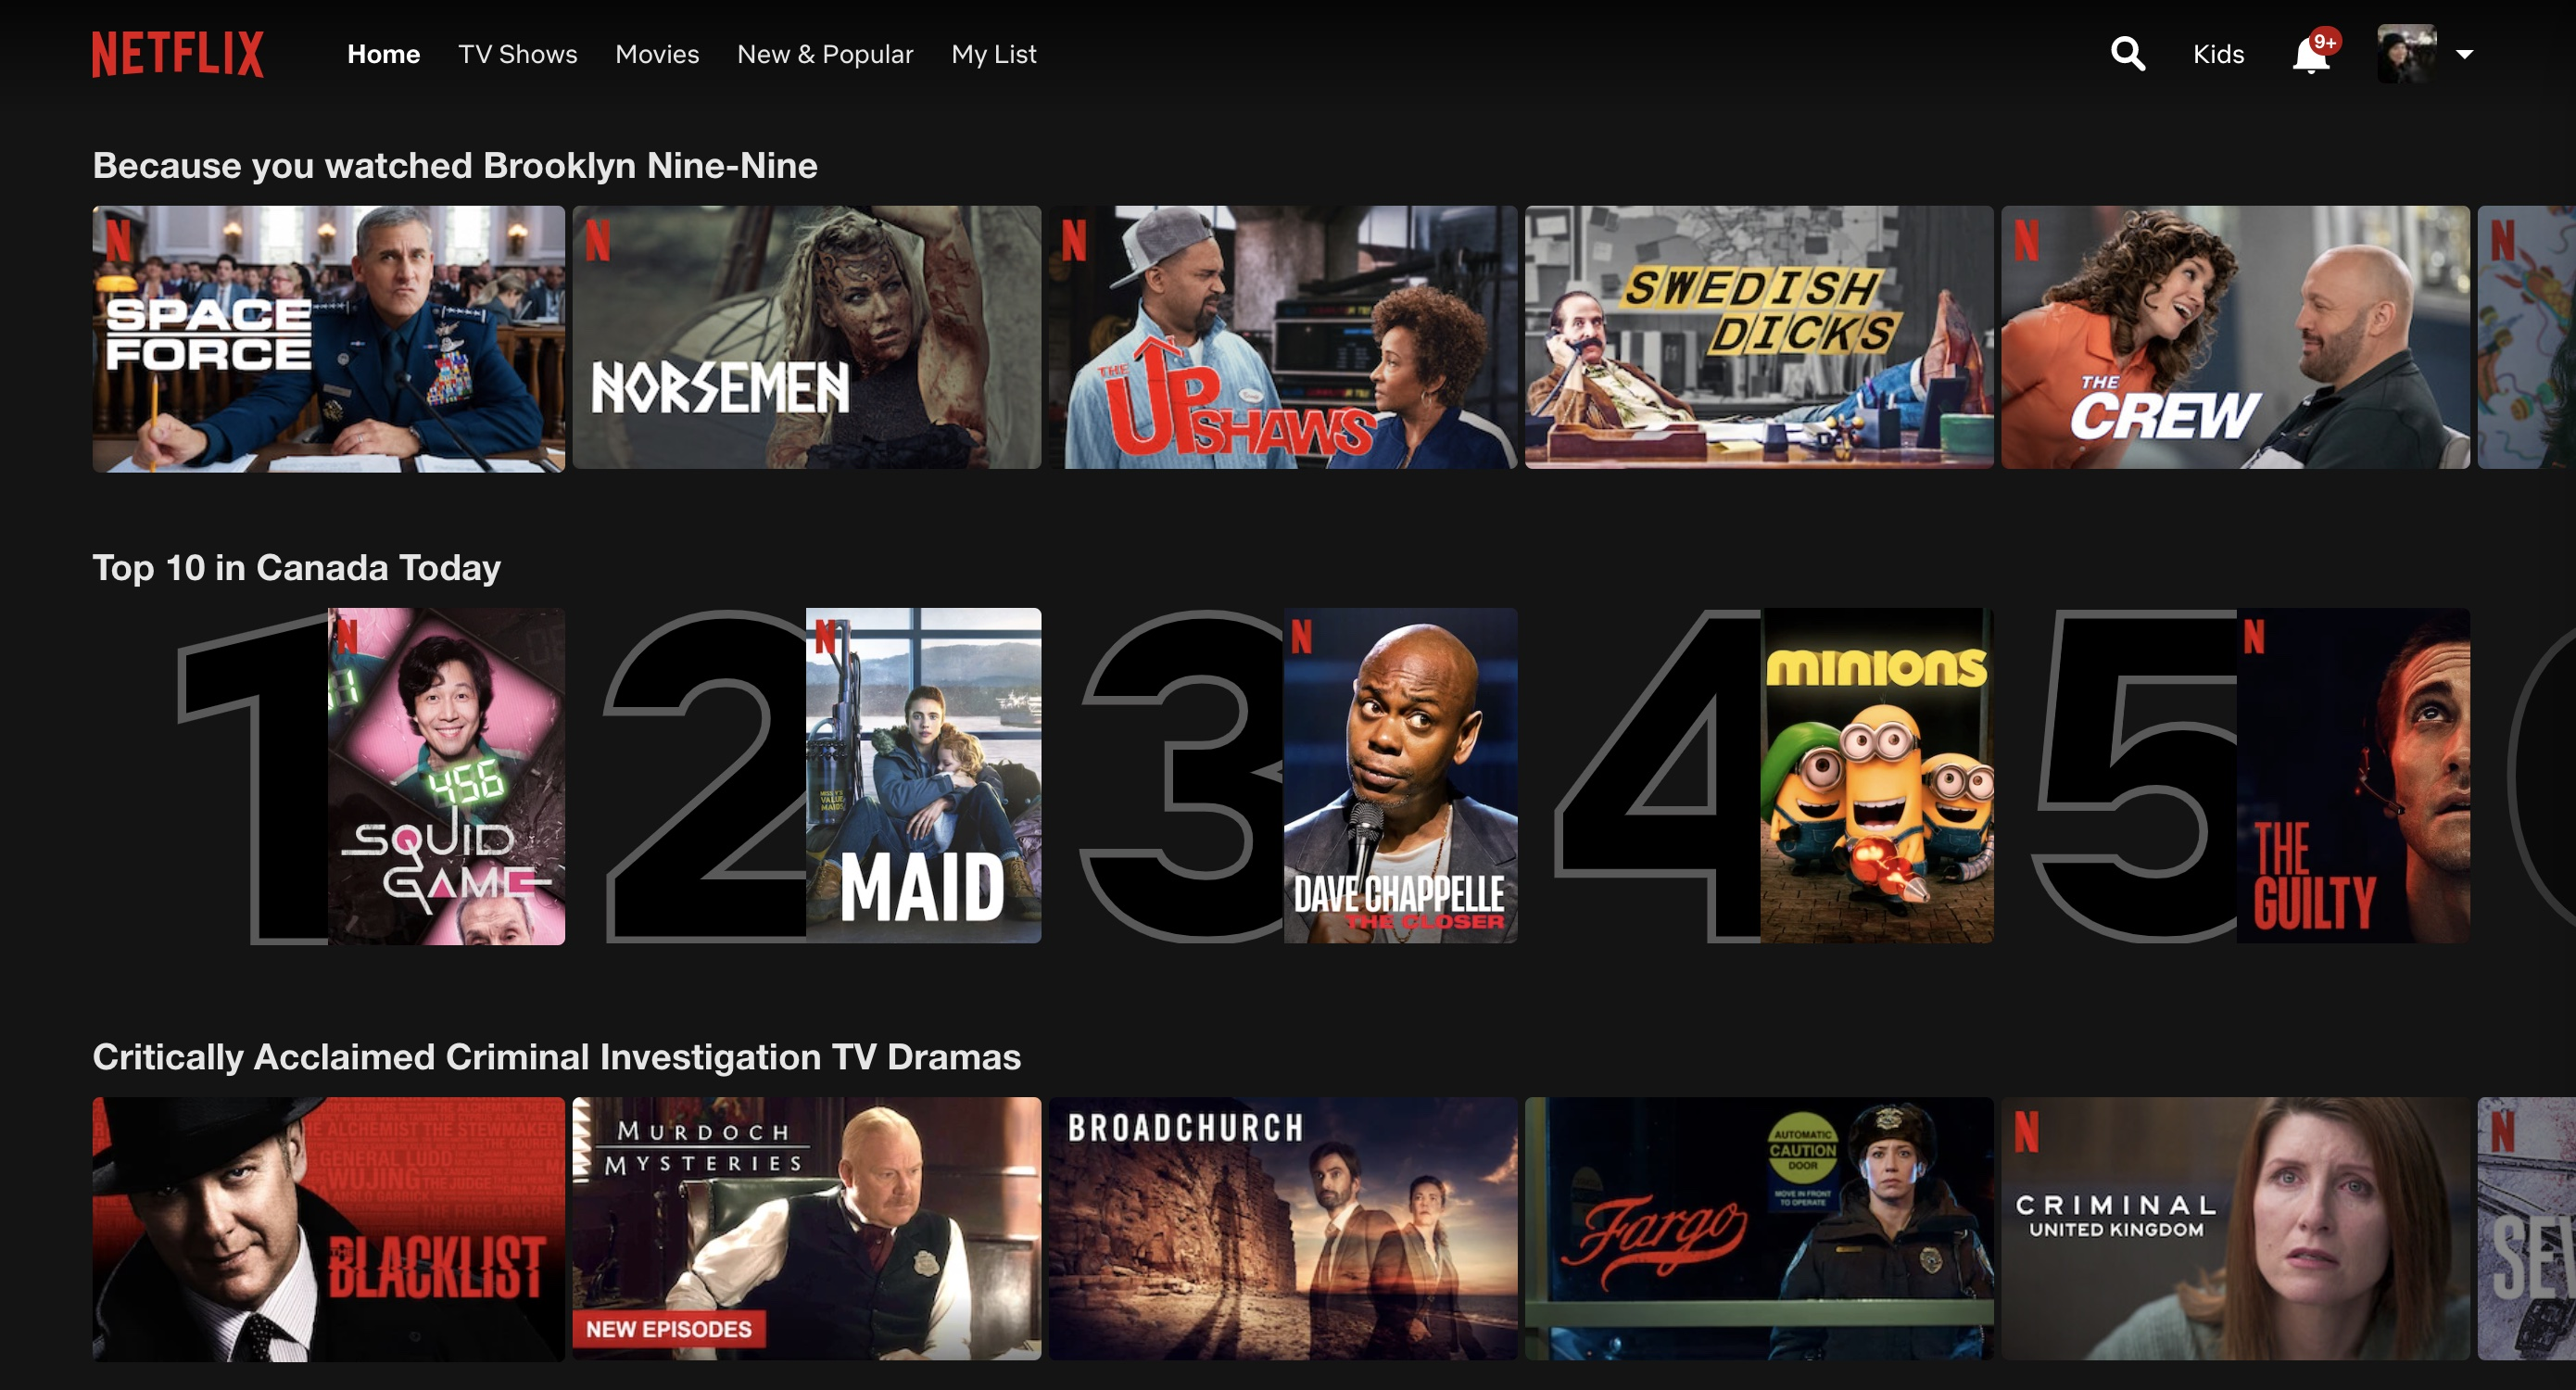

### 1. The dataset

First, let's start with importing the libraries we're going to use.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import datetime

Then we'll load my dataset. If you want to learn how to download your own viewing history, all the information can be found here: https://help.netflix.com/en/node/101917

In [2]:
# load my viewing history
df = pd.read_csv('NetflixViewingHistory.csv')
df.head(5)

,Title,Date
0,Modern Family: Season 7: Spread Your Wings,9/24/21
1,Modern Family: Season 7: Playdates,9/24/21
2,Modern Family: Season 7: White Christmas,9/24/21
3,Modern Family: Season 7: Clean Out Your Junk D...,9/23/21
4,"Modern Family: Season 7: Phil's Sexy, Sexy House",9/23/21


With this, we can observe that my viewing history only contains the title and the date when the show or movie was watched. So, let's first transform the date to a datetime format and split it into Day, Month, Year and Day of the week.

In [3]:
# to transform Date into datetime and split into Day, Month, Year and day of the week
df['Date'] = pd.to_datetime(df['Date'])
df['Year'], df['Month'] = df['Date'].dt.year, df['Date'].dt.month_name()
df['Day'] = df['Date'].dt.day
df['Day_of_week'] = df['Date'].dt.day_name()

And then split the title into show name, season and episode name.

In [4]:
# to split the Title into show_name, season and episode_name
show_details = df.Title.str.split(":",expand = True,n = 2)
df['show_name'] = show_details[0]
df['season'] = show_details[1]
df['episode_name'] = show_details[2]

Now we'll select only the columns we will need for the data analysis.

In [5]:
# select only the columns we need
df2 = df[['Date','Year', 'Month', 'Day', 'Day_of_week', 'show_name', 'episode_name']]
df2.head()

,Date,Year,Month,Day,Day_of_week,show_name,episode_name
0,2021-09-24,2021,September,24,Friday,Modern Family,Spread Your Wings
1,2021-09-24,2021,September,24,Friday,Modern Family,Playdates
2,2021-09-24,2021,September,24,Friday,Modern Family,White Christmas
3,2021-09-23,2021,September,23,Thursday,Modern Family,Clean Out Your Junk Drawer
4,2021-09-23,2021,September,23,Thursday,Modern Family,"Phil's Sexy, Sexy House"


### 2. Data cleaning with TV series data

Since my viewing history has a limited amount of information for us to use, I will merge this dataset with one from Kaggle that contains all the information about series on Netflix.

In [6]:
# load the TV series dataset
TV_series = pd.read_csv('series_data.csv')
TV_series.head(5)

,Poster_Link,Series_Title,Runtime_of_Series,Certificate,Runtime_of_Episodes,Genre,IMDB_Rating,Overview,Star1,Star2,Star3,Star4,No_of_Votes
0,https://m.media-amazon.com/images/M/MV5BYTRiND...,Game of Thrones,(2011–2019),A,57 min,"Action, Adventure, Drama",9.3,Nine noble families fight for control over the...,Emilia Clarke,Peter Dinklage,Kit Harington,Lena Headey,1773458
1,https://m.media-amazon.com/images/M/MV5BMjhiMz...,Breaking Bad,(2008–2013),18,49 min,"Crime, Drama, Thriller",9.5,A high school chemistry teacher diagnosed with...,Bryan Cranston,Aaron Paul,Anna Gunn,Betsy Brandt,1468887
2,https://m.media-amazon.com/images/M/MV5BMTc5Zm...,The Walking Dead,(2010– ),18+,44 min,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,Andrew Lincoln,Norman Reedus,Melissa McBride,Danai Gurira,854698
3,https://m.media-amazon.com/images/M/MV5BNDVkYj...,Friends,(1994–2004),13+,22 min,"Comedy, Romance",8.9,Follows the personal and professional lives of...,Jennifer Aniston,Courteney Cox,Lisa Kudrow,Matt LeBlanc,829816
4,https://m.media-amazon.com/images/M/MV5BMjEzMD...,Stranger Things,(2016– ),15,51 min,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...",Millie Bobby Brown,Finn Wolfhard,Winona Ryder,David Harbour,824966


Now let's select the columns we will need moving foward.

In [7]:
df3 = TV_series[['Series_Title','Runtime_of_Episodes', 'IMDB_Rating', 'Overview', 'Star1', 'Genre']]
df3.head()

,Series_Title,Runtime_of_Episodes,IMDB_Rating,Overview,Star1,Genre
0,Game of Thrones,57 min,9.3,Nine noble families fight for control over the...,Emilia Clarke,"Action, Adventure, Drama"
1,Breaking Bad,49 min,9.5,A high school chemistry teacher diagnosed with...,Bryan Cranston,"Crime, Drama, Thriller"
2,The Walking Dead,44 min,8.2,Sheriff Deputy Rick Grimes wakes up from a com...,Andrew Lincoln,"Drama, Horror, Thriller"
3,Friends,22 min,8.9,Follows the personal and professional lives of...,Jennifer Aniston,"Comedy, Romance"
4,Stranger Things,51 min,8.7,"When a young boy disappears, his mother, a pol...",Millie Bobby Brown,"Drama, Fantasy, Horror"


### 3. Merging the two DataFrames and final data cleaning

Finally, let's merge the two dataframes and do our final data cleaning before exporting the final dataframe as a .csv file.

In [8]:
df_merged = pd.merge(df2, df3, left_on = ['show_name'], 
                     right_on = ['Series_Title'], how = 'left')
df_merged.head()

,Date,Year,Month,Day,Day_of_week,show_name,episode_name,Series_Title,Runtime_of_Episodes,IMDB_Rating,Overview,Star1,Genre
0,2021-09-24,2021,September,24,Friday,Modern Family,Spread Your Wings,Modern Family,22 min,8.4,Three different but related families face tria...,Ed O'Neill,"Comedy, Drama, Romance"
1,2021-09-24,2021,September,24,Friday,Modern Family,Playdates,Modern Family,22 min,8.4,Three different but related families face tria...,Ed O'Neill,"Comedy, Drama, Romance"
2,2021-09-24,2021,September,24,Friday,Modern Family,White Christmas,Modern Family,22 min,8.4,Three different but related families face tria...,Ed O'Neill,"Comedy, Drama, Romance"
3,2021-09-23,2021,September,23,Thursday,Modern Family,Clean Out Your Junk Drawer,Modern Family,22 min,8.4,Three different but related families face tria...,Ed O'Neill,"Comedy, Drama, Romance"
4,2021-09-23,2021,September,23,Thursday,Modern Family,"Phil's Sexy, Sexy House",Modern Family,22 min,8.4,Three different but related families face tria...,Ed O'Neill,"Comedy, Drama, Romance"


In [9]:
# to drop Series_Title
df4 = df_merged.drop('Series_Title', 1)
df4.head(5)

,Date,Year,Month,Day,Day_of_week,show_name,episode_name,Runtime_of_Episodes,IMDB_Rating,Overview,Star1,Genre
0,2021-09-24,2021,September,24,Friday,Modern Family,Spread Your Wings,22 min,8.4,Three different but related families face tria...,Ed O'Neill,"Comedy, Drama, Romance"
1,2021-09-24,2021,September,24,Friday,Modern Family,Playdates,22 min,8.4,Three different but related families face tria...,Ed O'Neill,"Comedy, Drama, Romance"
2,2021-09-24,2021,September,24,Friday,Modern Family,White Christmas,22 min,8.4,Three different but related families face tria...,Ed O'Neill,"Comedy, Drama, Romance"
3,2021-09-23,2021,September,23,Thursday,Modern Family,Clean Out Your Junk Drawer,22 min,8.4,Three different but related families face tria...,Ed O'Neill,"Comedy, Drama, Romance"
4,2021-09-23,2021,September,23,Thursday,Modern Family,"Phil's Sexy, Sexy House",22 min,8.4,Three different but related families face tria...,Ed O'Neill,"Comedy, Drama, Romance"


In [10]:
# to split the Genre column
df4[["Genre1", "Genre2", "Genre3"]] = df4["Genre"].str.split(pat = ",", expand=True)
df4.head(5)

,Date,Year,Month,Day,Day_of_week,show_name,episode_name,Runtime_of_Episodes,IMDB_Rating,Overview,Star1,Genre,Genre1,Genre2,Genre3
0,2021-09-24,2021,September,24,Friday,Modern Family,Spread Your Wings,22 min,8.4,Three different but related families face tria...,Ed O'Neill,"Comedy, Drama, Romance",Comedy,Drama,Romance
1,2021-09-24,2021,September,24,Friday,Modern Family,Playdates,22 min,8.4,Three different but related families face tria...,Ed O'Neill,"Comedy, Drama, Romance",Comedy,Drama,Romance
2,2021-09-24,2021,September,24,Friday,Modern Family,White Christmas,22 min,8.4,Three different but related families face tria...,Ed O'Neill,"Comedy, Drama, Romance",Comedy,Drama,Romance
3,2021-09-23,2021,September,23,Thursday,Modern Family,Clean Out Your Junk Drawer,22 min,8.4,Three different but related families face tria...,Ed O'Neill,"Comedy, Drama, Romance",Comedy,Drama,Romance
4,2021-09-23,2021,September,23,Thursday,Modern Family,"Phil's Sexy, Sexy House",22 min,8.4,Three different but related families face tria...,Ed O'Neill,"Comedy, Drama, Romance",Comedy,Drama,Romance


In [11]:
df4.drop(['Genre', 'Genre2', 'Genre3'], axis = 1, inplace = True)
df4.head(2)

,Date,Year,Month,Day,Day_of_week,show_name,episode_name,Runtime_of_Episodes,IMDB_Rating,Overview,Star1,Genre1
0,2021-09-24,2021,September,24,Friday,Modern Family,Spread Your Wings,22 min,8.4,Three different but related families face tria...,Ed O'Neill,Comedy
1,2021-09-24,2021,September,24,Friday,Modern Family,Playdates,22 min,8.4,Three different but related families face tria...,Ed O'Neill,Comedy


In [12]:
# to delete everything that doesn't have Runtime_of_episodes, a.k.a it was not on TV_series dataframe
df5 = df4.dropna(subset = ['IMDB_Rating', 'Genre1'])
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6326 entries, 0 to 7494
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 6326 non-null   datetime64[ns]
 1   Year                 6326 non-null   int64         
 2   Month                6326 non-null   object        
 3   Day                  6326 non-null   int64         
 4   Day_of_week          6326 non-null   object        
 5   show_name            6326 non-null   object        
 6   episode_name         6310 non-null   object        
 7   Runtime_of_Episodes  6207 non-null   object        
 8   IMDB_Rating          6326 non-null   float64       
 9   Overview             6326 non-null   object        
 10  Star1                6326 non-null   object        
 11  Genre1               6326 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 642.5+ KB


Finally, let's export the cleaned dataframe as a .csv for to do the data visualization on Tableau.

In [13]:
# exporting the cleaned data for further visualization
df5.to_csv('netflix_cleaned_df.csv',index = False)

For the data visualization on Tableau, go to: https://public.tableau.com/app/profile/mardja.bueno